In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
print("Start data reading")
x_train = pd.read_csv("data/X_train.csv", header=None)
x_test = pd.read_csv("data/X_test.csv", header=None)
y_train = pd.read_csv("data/y_train.csv", header=None)
y_test = pd.read_csv("data/y_test.csv", header=None)
print("Finish data reading")

Start data reading
Finish data reading


In [3]:
clf = MLPClassifier((500, 500, 500))

print("Start model fitting")
clf.fit(x_train, y_train)
print("Finish model fitting")

Start model fitting


/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Finish model fitting


In [4]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (500, 500, 500),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [5]:
pred = clf.predict(x_test)

In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

In [11]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       0.90      0.97      0.93       496
          2       0.95      0.90      0.92       471
          3       0.96      0.95      0.95       420
          4       0.98      0.74      0.85       491
          5       0.81      0.98      0.88       532
          6       1.00      0.99      1.00       537

avg / total       0.93      0.92      0.92      2947



In [12]:
print(precision_score(y_test, pred, average=None))

[ 0.899  0.946  0.959  0.984  0.807  0.998]


In [15]:
from sklearn.metrics import recall_score

In [16]:
print(recall_score(y_test, pred, average=None))

[ 0.972  0.896  0.95   0.741  0.977  0.994]


In [13]:
print("accuracy : {}".format(accuracy_score(y_test, pred)))
print("f1_score : {}".format(f1_score(y_test, pred, average=None)))

accuracy : 0.9233118425517476
f1_score : [ 0.934  0.92   0.955  0.846  0.884  0.996]


Normalized confusion matrix
[[ 0.972  0.008  0.02   0.     0.     0.   ]
 [ 0.089  0.896  0.015  0.     0.     0.   ]
 [ 0.01   0.04   0.95   0.     0.     0.   ]
 [ 0.     0.006  0.     0.741  0.251  0.002]
 [ 0.011  0.     0.     0.011  0.977  0.   ]
 [ 0.004  0.     0.     0.     0.002  0.994]]


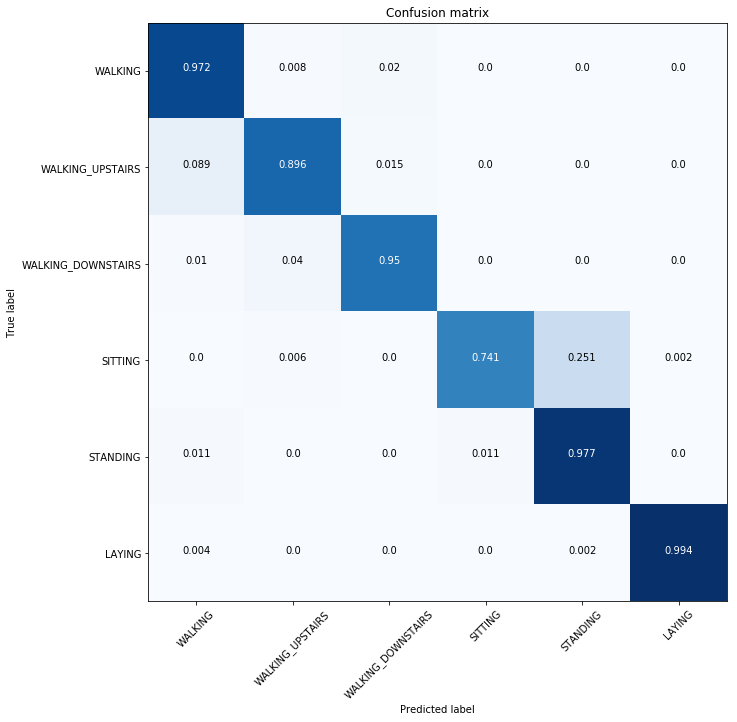

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=3)

plt.figure(figsize=(10, 10))

class_names = ["WALKING", 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix', normalize=True)
plt.savefig("confusion_maxtrix.png")
plt.show()